## 第64课 使用Stacked LSTM预测Apple股票价格T+N


### Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

### Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


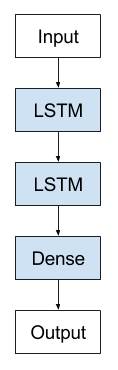

In [309]:
#A Stacked LSTM architecture can be defined as an LSTM model comprised of multiple LSTM layers. An LSTM layer below provides 
#a sequence output rather than a single value output to the LSTM layer below

from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson64-architecture_stacked_lstm.png')

In [310]:
### Keras and Tensorflow >2.0

In [389]:
import pandas as pd

In [390]:
df=pd.read_csv('Lesson64-AAPL.csv')

In [391]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [392]:
df1=df.reset_index()['close']

In [394]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

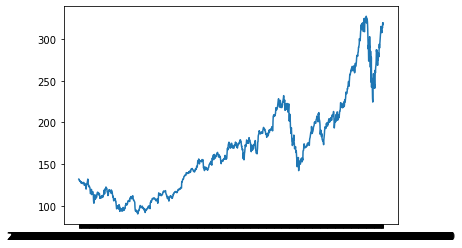

In [395]:
import matplotlib.pyplot as plt
plt.plot(df['date'],df1)

In [317]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [396]:
import numpy as np

In [397]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [398]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [399]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [400]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [401]:
training_size,test_size

(817, 441)

In [404]:
train_data.shape

(817, 1)

In [364]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----9
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [405]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [406]:
print(X_train.shape), print(y_train.shape)

(806, 10)
(806,)


(None, None)

In [407]:
print(X_test.shape), print(y_test.shape)

(430, 10)
(430,)


(None, None)

In [408]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.16174111, 0.1581525 ,
        0.15654817],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.1581525 , 0.15654817,
        0.16271215],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.15654817, 0.16271215,
        0.1614878 ],
       ...,
       [0.49417377, 0.49670692, 0.50126657, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.49670692, 0.50126657, 0.49299164, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.50126657, 0.49299164, 0.49358271, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [409]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [410]:
print(X_train.shape), print(X_test.shape)

(806, 10, 1)
(430, 10, 1)


(None, None)

In [411]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [412]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [413]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 10, 50)            10400     
_________________________________________________________________
lstm_25 (LSTM)               (None, 10, 50)            20200     
_________________________________________________________________
lstm_26 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [414]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 2s 136ms/step - loss: 0.0227 - val_loss: 0.0136
Epoch 2/100
13/13 [==============================] - 0s 33ms/step - loss: 0.0057 - val_loss: 0.0107
Epoch 3/100
13/13 [==============================] - 0s 34ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 4/100
13/13 [==============================] - 0s 32ms/step - loss: 7.0891e-04 - val_loss: 0.0026
Epoch 5/100
13/13 [==============================] - 0s 29ms/step - loss: 4.7271e-04 - val_loss: 0.0024
Epoch 6/100
13/13 [==============================] - 0s 37ms/step - loss: 4.1640e-04 - val_loss: 0.0041
Epoch 7/100
13/13 [==============================] - 0s 33ms/step - loss: 3.9866e-04 - val_loss: 0.0033
Epoch 8/100
13/13 [==============================] - 0s 38ms/step - loss: 4.0189e-04 - val_loss: 0.0032
Epoch 9/100
13/13 [==============================] - 0s 33ms/step - loss: 4.0352e-04 - val_loss: 0.0028
Epoch 10/100
13/13 [==============================] - 0s 32ms/step - loss: 

Epoch 79/100
13/13 [==============================] - 0s 36ms/step - loss: 2.2988e-04 - val_loss: 0.0024
Epoch 80/100
13/13 [==============================] - 0s 35ms/step - loss: 2.2889e-04 - val_loss: 0.0017
Epoch 81/100
13/13 [==============================] - 0s 31ms/step - loss: 2.6264e-04 - val_loss: 0.0013
Epoch 82/100
13/13 [==============================] - 0s 31ms/step - loss: 2.3328e-04 - val_loss: 0.0010
Epoch 83/100
13/13 [==============================] - 0s 33ms/step - loss: 2.1982e-04 - val_loss: 0.0015
Epoch 84/100
13/13 [==============================] - 0s 33ms/step - loss: 2.1616e-04 - val_loss: 0.0012
Epoch 85/100
13/13 [==============================] - 0s 32ms/step - loss: 2.0065e-04 - val_loss: 0.0011
Epoch 86/100
13/13 [==============================] - 0s 32ms/step - loss: 2.0269e-04 - val_loss: 0.0012
Epoch 87/100
13/13 [==============================] - 0s 31ms/step - loss: 2.0073e-04 - val_loss: 9.4347e-04
Epoch 88/100
13/13 [==============================]

In [415]:
import tensorflow as tf

In [416]:
tf.__version__

'2.3.0'

In [417]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [418]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [419]:
y_train

array([0.16271215, 0.1614878 , 0.1554927 , 0.15443722, 0.15730811,
       0.15604154, 0.15849025, 0.15308621, 0.15735033, 0.15490163,
       0.15946129, 0.15688592, 0.1537195 , 0.14434687, 0.14812547,
       0.15308621, 0.15241071, 0.15055307, 0.14924428, 0.13607194,
       0.12551718, 0.13906949, 0.14911762, 0.14890653, 0.15401503,
       0.16115005, 0.16583636, 0.17618002, 0.17060711, 0.14725998,
       0.14700667, 0.14422021, 0.13691632, 0.13949168, 0.13784514,
       0.13522756, 0.13071012, 0.11863548, 0.10259225, 0.1058009 ,
       0.10466098, 0.10630752, 0.12403952, 0.09773706, 0.10512539,
       0.10474542, 0.10816516, 0.11323144, 0.11044499, 0.10415435,
       0.09419066, 0.06510175, 0.05395592, 0.0565735 , 0.08169383,
       0.09533058, 0.09689268, 0.09465507, 0.07337668, 0.09288187,
       0.08456472, 0.07992063, 0.09275521, 0.0836359 , 0.09385291,
       0.10077683, 0.10542092, 0.10951617, 0.11006502, 0.09955248,
       0.09756818, 0.10499873, 0.09735709, 0.10124124, 0.10411

In [420]:
train_predict

array([[128.67326 ],
       [128.315   ],
       [128.17229 ],
       [127.96904 ],
       [127.74283 ],
       [127.54961 ],
       [127.429955],
       [127.3978  ],
       [127.295685],
       [127.21236 ],
       [127.12318 ],
       [127.24697 ],
       [127.395836],
       [127.371506],
       [126.98535 ],
       [126.47526 ],
       [126.0737  ],
       [125.89485 ],
       [125.76717 ],
       [125.74148 ],
       [125.3531  ],
       [124.46695 ],
       [123.55887 ],
       [123.132095],
       [123.130516],
       [123.70139 ],
       [124.822655],
       [126.270164],
       [128.00967 ],
       [129.60924 ],
       [130.02336 ],
       [129.29698 ],
       [128.05312 ],
       [126.48534 ],
       [124.89691 ],
       [123.60189 ],
       [122.693794],
       [122.05158 ],
       [121.43122 ],
       [120.252335],
       [118.56426 ],
       [116.968   ],
       [115.70927 ],
       [115.26733 ],
       [115.05868 ],
       [114.984474],
       [114.98274 ],
       [115.0

In [421]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.0133350598154

In [422]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

232.62944959052982

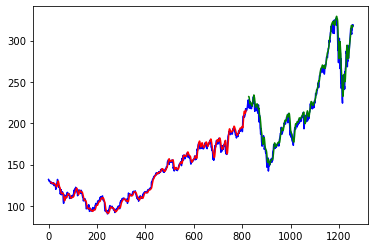

In [432]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),'blue')
plt.plot(trainPredictPlot,'red')
plt.plot(testPredictPlot,'green')
plt.show()

In [433]:
len(test_data)

441

In [434]:
x_input=test_data[431:].reshape(1,-1)
x_input.shape

(1, 10)

In [435]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [436]:
temp_input

[0.9485349995778098,
 0.9333361479354896,
 0.9174617917757326,
 0.925441188887951,
 0.9177151059697712,
 0.9483239044161109,
 0.9406400405302711,
 0.9663514312251966,
 0.9563033015283293,
 0.964915984125644]

In [440]:
# demonstrate prediction for next 3 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<3):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.96635143 0.9563033  0.96491598 0.97758609 0.98771793 0.99749744
 1.00683796 1.01684594 1.02630866 1.03724563]
0 day output [[1.0473676]]
1 day input [0.9563033  0.96491598 0.97758609 0.98771793 0.99749744 1.00683796
 1.01684594 1.02630866 1.03724563 1.04736757]
1 day output [[1.0585936]]
2 day input [0.96491598 0.97758609 0.98771793 0.99749744 1.00683796 1.01684594
 1.02630866 1.03724563 1.04736757 1.05859363]
2 day output [[1.0688719]]
[[1.0473675727844238], [1.0585936307907104], [1.0688718557357788]]


In [442]:
day_new=np.arange(1,11)
day_pred=np.arange(11,14)

In [443]:
day_new.shape

(10,)

In [444]:
day_pred.shape

(3,)

In [445]:
import matplotlib.pyplot as plt

In [446]:
len(df1)

1258

In [447]:
scaler.inverse_transform(lst_output)

array([[338.41948329],
       [341.07848739],
       [343.51298775]])

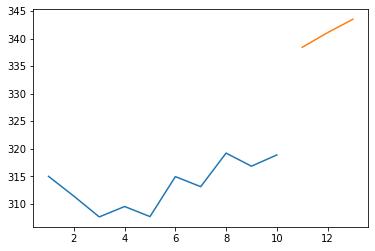

In [448]:
plt.plot(day_new,scaler.inverse_transform(df1[1248:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

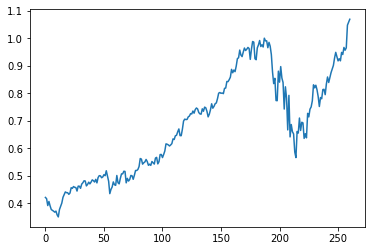

In [449]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [450]:
df3=scaler.inverse_transform(df3).tolist()

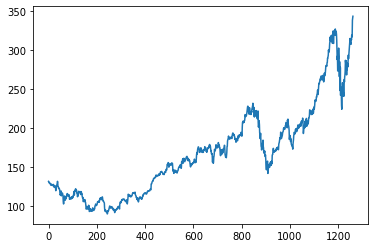

In [451]:
plt.plot(df3)